1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

In [2]:
import pandas as pd
import numpy as np
import copy

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [3]:
file_name = "./data/data_000637.txt"
'''
Choose N to be smaller than or equal to the maximum number of rows and larger that 10k. 
'''
data = pd.read_csv(file_name)
N_rows = data.shape[0]
# I should choose N in the interval [10000, N_rows], with N_rows greater than 10000, and the following piece of coding would 
# serve the purpose of setting the value of N to the minimum between these two quantities. Note that if the condition N_rows 
# greater than 10000 is not met, then the system takes 10000 as the value of N.
'''
threshold = 10000
N = min(threshold, N_rows)
if (N<threshold):
    N = threshold
data = data[:N]
'''
print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [4]:
data2 = data.copy()
count = data2.groupby('ORBIT_CNT')['BX_COUNTER'].agg(list)
count_max = 0
for i in range(len(count)):
    width = count.iloc[i]
    for j in range(len(width)):
        new_val = count.iloc[i][j]
        if(count_max<new_val):
            count_max = new_val
print("Estimated number of BX in a ORBIT: ", count_max)
for i in range(len(data2['BX_COUNTER'])-1):
    if(data2['BX_COUNTER'][i]==count_max):
        print("The value of BX_COUNTER is: ", data2['BX_COUNTER'][i], " while the value of the orbit is: ", data2['ORBIT_CNT'][i])
        print("\n Now we check that the next value of BX_COUNTER is set to 0: \n")
        print("The value of the next BX_COUNTER is: ", data2['BX_COUNTER'][i+1], " while the value of the next orbit is: ", data2['ORBIT_CNT'][i+1])
        print("End of the check for this orbit \n")

Estimated number of BX in a ORBIT:  3563
The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869200195

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  0  while the value of the next orbit is:  3869200196
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869200207

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  8  while the value of the next orbit is:  3869200208
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869200211

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3555  while the value of the next orbit is:  3869200211
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869200214

 Now we check that the next value of BX_COUNTER is set to 0: 

The v

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869201341

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  2  while the value of the next orbit is:  3869201342
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869201401

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  2  while the value of the next orbit is:  3869201402
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869201439

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3563  while the value of the next orbit is:  3869201439
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869201439

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  204  whi

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869202695

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  179  while the value of the next orbit is:  3869202696
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869202696

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  11  while the value of the next orbit is:  3869202697
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869202702

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  4  while the value of the next orbit is:  3869202703
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869202801

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3561  wh

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869203637

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3563  while the value of the next orbit is:  3869203637
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869203637

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3561  while the value of the next orbit is:  3869203637
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869203637

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3561  while the value of the next orbit is:  3869203637
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869203719

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  0 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869205218

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3562  while the value of the next orbit is:  3869205218
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869205218

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3562  while the value of the next orbit is:  3869205218
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869205218

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  9  while the value of the next orbit is:  3869205219
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869205218

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3  wh

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869206540

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3561  while the value of the next orbit is:  3869206540
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869206576

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3  while the value of the next orbit is:  3869206577
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869206608

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  5  while the value of the next orbit is:  3869206609
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869206664

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  30  whil

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869207586

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  203  while the value of the next orbit is:  3869207587
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869207602

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  42  while the value of the next orbit is:  3869207603
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869207632

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  0  while the value of the next orbit is:  3869207633
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869207766

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  1  while

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869208444

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  5  while the value of the next orbit is:  3869208445
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869208444

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  11  while the value of the next orbit is:  3869208445
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869208494

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3563  while the value of the next orbit is:  3869208494
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869208494

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  0  whil

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869209362

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  2  while the value of the next orbit is:  3869209363
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869209382

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3  while the value of the next orbit is:  3869209383
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869209393

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  2  while the value of the next orbit is:  3869209394
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869209404

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3555  while

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869210298

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  1  while the value of the next orbit is:  3869210299
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869210361

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  7  while the value of the next orbit is:  3869210362
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869210377

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3555  while the value of the next orbit is:  3869210377
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869210390

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  10  whil

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869211030

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3545  while the value of the next orbit is:  3869211030
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869211030

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  4  while the value of the next orbit is:  3869211031
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869211040

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3560  while the value of the next orbit is:  3869211040
End of the check for this orbit 

The value of BX_COUNTER is:  3563  while the value of the orbit is:  3869211056

 Now we check that the next value of BX_COUNTER is set to 0: 

The value of the next BX_COUNTER is:  3563 

3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

*Hint:* introduce an offset to the absolute time such that the start of the data acquisition (i.e. the first entry) is zero.

In [5]:
import datetime as dt
date = dt.date.today()
data3 = data.copy()
#I convert the orbit and BX counter to seconds --> nanoseconds
print("Estimate the number of BX in a ORBIT: ", count_max)
time = data3['ORBIT_CNT']*count_max*25 + data3['BX_COUNTER'] * 25 + data3['TDC_MEAS'] *(25/30)*1
print(time)
minimum = time[0]
time -= minimum
data3['Time in ns'] = time
data3['Time in ns']=pd.to_datetime(data3['Time in ns'])
print(data3)

Estimate the number of BX in a ORBIT:  3563
0          3.446490e+14
1          3.446490e+14
2          3.446490e+14
3          3.446490e+14
4          3.446490e+14
               ...     
1310715    3.446500e+14
1310716    3.446500e+14
1310717    3.446500e+14
1310718    3.446500e+14
1310719    3.446500e+14
Length: 1310720, dtype: float64
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [6]:
import datetime as dt
data4 = data3.copy()
data4['Time'] = pd.to_datetime(data3['Time in ns'], unit='ns', format='HHMMSS')
print(data4)
# We can't see the difference between the timings of the first two rows even tough we see that they have a different value printed 
# for the time expressed in ns: this is because the function pd.to_datetime has precision equal to a nanosecond and if the input 
# has higher precision, this is truncated to nanoseconds. In our case, the second row differs from the first for 0.8 nanoseconds 
# thus it should require precision higher than that of the pd.to_timedelta in order to see different timings using the Time Series.

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                           Time in ns                          Time  
0       1970-01-01 00:00:00.000000000 1970-01-01 00:00:00.000000000  
1       1970-01-01 

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [7]:
data5 = data.copy()
noisy_channels = data5.groupby('TDC_CHANNEL', sort=False).count().iloc[:, 0]
noisy_sort = sorted(noisy_channels, reverse=True)
print("TDC_CHANNEL with most counts, presented with their corresponding counts: ")
for i in range(0,3):
    for j in range(0, len(noisy_channels)):
        if(noisy_sort[i]==noisy_channels.values[j]):
            print(noisy_channels.index[j], "\t", noisy_channels.values[j])

TDC_CHANNEL with most counts, presented with their corresponding counts: 
139 	 108059
64 	 66020
63 	 64642


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [8]:
data6 = data.copy()
num_orbits = len(data6.groupby('ORBIT_CNT').count().index)
print("Number of orbits in total: ", num_orbits)
orb_min = data6['ORBIT_CNT'][0]
orb_max = data6['ORBIT_CNT'][len(data6['ORBIT_CNT'])-1]
print("Number of first orbit: ", orb_min, "\nNumber of last orbit: ", orb_max, "\n\n")
diff = orb_max - orb_min
print("The difference between the last and the first orbit is: ", diff)
empty_orb = diff - num_orbits
print("Given the fact we have ", num_orbits, " orbits in total but there should be ", diff, " orbits, it means that we have ",
      empty_orb, " empty orbits. This tells us that the number of non-empty orbits is: ", num_orbits)

Number of orbits in total:  11001
Number of first orbit:  3869200167 
Number of last orbit:  3869211171 


The difference between the last and the first orbit is:  11004
Given the fact we have  11001  orbits in total but there should be  11004  orbits, it means that we have  3  empty orbits. This tells us that the number of non-empty orbits is:  11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [9]:
data7 = data.copy()
new_df = data7[data7['TDC_CHANNEL'] == 139]
print("The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is: ", 
      len(new_df.groupby('ORBIT_CNT').count().index))

The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is:  10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [10]:
'''
I could take out the automatic sorting done by groupby, but considering I'll need these series also to plot histograms it is 
better to keep them in an increasing order by index, which is the TDC_CHANNEL.
'''
data8 = data.copy()
mask1 = data8['FPGA']==0
channel_1 = data8[mask1].groupby('TDC_CHANNEL').count().iloc[:, 0]
series1 = pd.Series(channel_1.values, index=channel_1.index)
print("The first series corresponding to FPGA = 0 is: \n", series1)
mask2 = data8['FPGA']==1
channel_2 = data8[mask2].groupby('TDC_CHANNEL').count().iloc[:, 0]
series2 = pd.Series(channel_2.values, index=channel_2.index)
print("The second series corresponding to FPGA = 1 is: \n", series2)

The first series corresponding to FPGA = 0 is: 
 TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Length: 124, dtype: int64
The second series corresponding to FPGA = 1 is: 
 TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

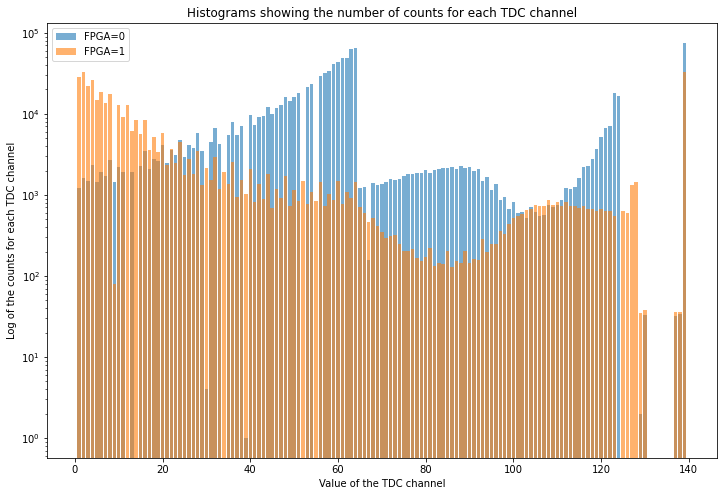

In [11]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(12, 8))
plt.bar(series1.index, series1, alpha=0.6, label='FPGA=0')
plt.bar(series2.index, series2, alpha=0.6, label='FPGA=1')
plt.yscale('log')
plt.xlabel('Value of the TDC channel')
plt.ylabel('Log of the counts for each TDC channel')
plt.title('Histograms showing the number of counts for each TDC channel')
plt.legend()
plt.show()